In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load data and view first 5 rows
data = pd.read_stata('rainfall_2.dta')
data.head()

,fid,cell_count,mean_mon_rainfall_mm,time,iso3,svycode,svyl1cd,svyl1nm,svyl2cd,svyl2nm,prttynm,rn
0,0,6,52.755573,1981.01001,UGA,uga2013,1,Central,102,KAMPALA,KAMPALA,
1,1,80,20.932796,1981.01001,UGA,uga2013,1,Central,123,KYANKWANZI,KIBOGA,
2,2,17,33.781631,1981.01001,UGA,uga2013,1,Central,118,BUKOMANSIMBI,MASAKA,
3,3,103,38.626671,1981.01001,UGA,uga2013,1,Central,124,LWENGO,MASAKA,
4,4,27,37.377052,1981.01001,UGA,uga2013,1,Central,122,KALUNGU,MASAKA,


In [3]:
# Check dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193004 entries, 0 to 193003
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fid                   193004 non-null  int16  
 1   cell_count            193004 non-null  int16  
 2   mean_mon_rainfall_mm  193004 non-null  float32
 3   time                  193004 non-null  float32
 4   iso3                  193004 non-null  object 
 5   svycode               193004 non-null  object 
 6   svyl1cd               193004 non-null  int8   
 7   svyl1nm               193004 non-null  object 
 8   svyl2cd               193004 non-null  int16  
 9   svyl2nm               193004 non-null  object 
 10  prttynm               193004 non-null  object 
 11  rn                    193004 non-null  object 
dtypes: float32(2), int16(3), int8(1), object(6)
memory usage: 13.1+ MB


In [4]:
# View unique country iso3 codes
data.iso3.unique()

array(['UGA', 'TZA', 'GHA'], dtype=object)

In [5]:
# Load Ghana data into 'gh_rain_data'
gh_rain_data = data[data['iso3'] == 'GHA']
# View first 5 rows
gh_rain_data.head()

,fid,cell_count,mean_mon_rainfall_mm,time,iso3,svycode,svyl1cd,svyl1nm,svyl2cd,svyl2nm,prttynm,rn
282,282,19,6.065213,1981.01001,GHA,gha2012,6,Ashanti,17,Ahafo Ano North,Ahafo Ano North,0
283,283,39,5.155084,1981.01001,GHA,gha2012,6,Ashanti,16,Ahafo Ano South,Ahafo Ano South,1
284,284,41,4.253942,1981.01001,GHA,gha2012,6,Ashanti,2,Amansie West,Amansie West,2
285,285,49,3.583445,1981.01001,GHA,gha2012,6,Ashanti,10,Asante Akim North,Asante Akim North,3
286,286,37,4.436135,1981.01001,GHA,gha2012,6,Ashanti,9,Asante Akim South,Asante Akim South,4


In [6]:
# View last 5 rows
gh_rain_data.tail()

,fid,cell_count,mean_mon_rainfall_mm,time,iso3,svycode,svyl1cd,svyl1nm,svyl2cd,svyl2nm,prttynm,rn
192999,447,36,171.675644,2016.069946,GHA,gha2012,4,Volta,13,Jasikan,Jasikan,165
193000,448,13,52.204678,2016.069946,GHA,gha2012,4,Volta,4,Ketu North,Ketu North,166
193001,449,10,44.619186,2016.069946,GHA,gha2012,4,Volta,3,Ketu South,Ketu South,167
193002,450,31,238.490906,2016.069946,GHA,gha2012,4,Volta,18,Nkwanta North,Nkwanta North,168
193003,451,100,255.096298,2016.069946,GHA,gha2012,4,Volta,17,Nkwanta South,Nkwanta South,169


In [7]:
# View statistical evaluations of numerical columns
gh_rain_data.describe()

,fid,cell_count,mean_mon_rainfall_mm,time,svyl1cd,svyl2cd
count,72590.000000,72590.000000,72590.000000,72590.000000,72590.000000,72590.000000
mean,366.500000,46.241176,101.957565,1998.808594,5.323529,9.964706
std,49.074262,49.265356,79.951988,10.282920,2.577301,6.259055
min,282.000000,2.000000,0.251909,1981.010010,1.000000,1.000000
25%,324.000000,18.000000,31.121050,1989.109985,3.000000,5.000000
50%,366.500000,31.000000,91.322670,1998.099976,6.000000,9.000000
75%,409.000000,54.000000,155.852806,2007.089966,7.000000,15.000000
max,451.000000,287.000000,579.755920,2016.069946,10.000000,27.000000


In [8]:
# Number of duplicated rows
gh_rain_data.duplicated().sum()

0

In [9]:
# Number of null values in each column
gh_rain_data.isna().sum()

fid                     0
cell_count              0
mean_mon_rainfall_mm    0
time                    0
iso3                    0
svycode                 0
svyl1cd                 0
svyl1nm                 0
svyl2cd                 0
svyl2nm                 0
prttynm                 0
rn                      0
dtype: int64

In [10]:
# Unique time (year + month) values
gh_rain_data.time.unique()

array([1981.01, 1981.02, 1981.03, 1981.04, 1981.05, 1981.06, 1981.07,
       1981.08, 1981.09, 1981.1 , 1981.11, 1981.12, 1982.01, 1982.02,
       1982.03, 1982.04, 1982.05, 1982.06, 1982.07, 1982.08, 1982.09,
       1982.1 , 1982.11, 1982.12, 1983.01, 1983.02, 1983.03, 1983.04,
       1983.05, 1983.06, 1983.07, 1983.08, 1983.09, 1983.1 , 1983.11,
       1983.12, 1984.01, 1984.02, 1984.03, 1984.04, 1984.05, 1984.06,
       1984.07, 1984.08, 1984.09, 1984.1 , 1984.11, 1984.12, 1985.01,
       1985.02, 1985.03, 1985.04, 1985.05, 1985.06, 1985.07, 1985.08,
       1985.09, 1985.1 , 1985.11, 1985.12, 1986.01, 1986.02, 1986.03,
       1986.04, 1986.05, 1986.06, 1986.07, 1986.08, 1986.09, 1986.1 ,
       1986.11, 1986.12, 1987.01, 1987.02, 1987.03, 1987.04, 1987.05,
       1987.06, 1987.07, 1987.08, 1987.09, 1987.1 , 1987.11, 1987.12,
       1988.01, 1988.02, 1988.03, 1988.04, 1988.05, 1988.06, 1988.07,
       1988.08, 1988.09, 1988.1 , 1988.11, 1988.12, 1989.01, 1989.02,
       1989.03, 1989

In [11]:
# View unique regions
gh_rain_data.svyl1nm.unique()

array(['Ashanti', 'Brong Ahafo', 'Central', 'Eastern', 'Greater Accra',
       'Upper West', 'Volta', 'Western', 'Upper East', 'Northern'],
      dtype=object)

In [12]:
# View unique 'svycode' values
gh_rain_data.svycode.unique()

array(['gha2012'], dtype=object)

In [13]:
# View unique sorted 'svyl1cd' values
np.sort(gh_rain_data.svyl1cd.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

In [14]:
# View unique sorted 'svyl2cd' values
np.sort(gh_rain_data.svyl2cd.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int16)

In [15]:
# View unique sorted 'svyl2nm' values
np.sort(gh_rain_data.svyl2nm.unique())

array(['A M A', 'Abura / Asebu / Kwamankese', 'Adaklu Anyigbe',
       'Adansi North', 'Adansi South', 'Adenta', 'Afigya Kwabre',
       'Agona East', 'Agona West', 'Ahafo Ano North', 'Ahafo Ano South',
       'Ahanta West', 'Ajumanku / Enyan / Essiam', 'Akatsi',
       'Akwapim North', 'Akwapim South', 'Akyemansa', 'Amansie Central',
       'Amansie West', 'Aowin / Suaman', 'Asante Akim North',
       'Asante Akim South', 'Ashaiman', 'Asikuma / Odoben / Brakwa',
       'Assin North', 'Assin South', 'Asunafo North', 'Asunafo South',
       'Asuogyaman', 'Asutifi', 'Atebubu Amantin', 'Atiwa',
       'Atwima Kwanwoma', 'Atwima Mponua', 'Atwima Nwabiagya',
       'Awutu Senya', 'Bawku Municipal', 'Bawku West', 'Bekwai Municipal',
       'Berekum', 'Bia', 'Biakoye', 'Birim Central Municipal',
       'Birim North', 'Birim South', 'Bole', 'Bolgatanga', 'Bongo',
       'Bosome Freho', 'Bosumtwi', 'Builsa', 'Bunkpurugu Yonyo',
       'Cape Coast', 'Central Gonja', 'Chereponi', 'Dangbe East',
 

In [16]:
# View unique sorted 'prttynm' values
np.sort(gh_rain_data.prttynm.unique())

array(['A M a', 'Abura / Asebu / Kwamankese', 'Adaklu Anyigbe',
       'Adansi North', 'Adansi South', 'Adenta', 'Afigya Kwabre',
       'Agona East', 'Agona West', 'Ahafo Ano North', 'Ahafo Ano South',
       'Ahanta West', 'Ajumanku / Enyan / Essiam', 'Akatsi',
       'Akwapim North', 'Akwapim South', 'Akyemansa', 'Amansie Central',
       'Amansie West', 'Aowin / Suaman', 'Asante Akim North',
       'Asante Akim South', 'Ashaiman', 'Asikuma / Odoben / Brakwa',
       'Assin North', 'Assin South', 'Asunafo North', 'Asunafo South',
       'Asuogyaman', 'Asutifi', 'Atebubu Amantin', 'Atiwa',
       'Atwima Kwanwoma', 'Atwima Mponua', 'Atwima Nwabiagya',
       'Awutu Senya', 'Bawku Municipal', 'Bawku West', 'Bekwai Municipal',
       'Berekum', 'Bia', 'Biakoye', 'Birim Central Municipal',
       'Birim North', 'Birim South', 'Bole', 'Bolgatanga', 'Bongo',
       'Bosome Freho', 'Bosumtwi', 'Builsa', 'Bunkpurugu Yonyo',
       'Cape Coast', 'Central Gonja', 'Chereponi', 'Dangbe East',
 

In [17]:
# View unique 'rn' values
gh_rain_data.rn.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144

In [18]:
# Number of fields per column where svyl2nm and prttynm aren't the same/equal
gh_rain_data[gh_rain_data['svyl2nm'] != gh_rain_data['prttynm']].count()

fid                     854
cell_count              854
mean_mon_rainfall_mm    854
time                    854
iso3                    854
svycode                 854
svyl1cd                 854
svyl1nm                 854
svyl2cd                 854
svyl2nm                 854
prttynm                 854
rn                      854
dtype: int64

In [19]:
# svyl2nm values where svyl2nm and prttynm aren't equal
gh_rain_data[gh_rain_data['svyl2nm'] != gh_rain_data['prttynm']].svyl2nm.value_counts()

K M A    427
A M A    427
Name: svyl2nm, dtype: int64

In [20]:
# prttynm values where svyl2nm and prttynm aren't equal
gh_rain_data[gh_rain_data['svyl2nm'] != gh_rain_data['prttynm']].prttynm.value_counts()

K M a    427
A M a    427
Name: prttynm, dtype: int64

In [21]:
# Create new dataframe with selected columns
df = gh_rain_data[['cell_count', 'mean_mon_rainfall_mm', 'time', 'svyl1nm', 'svyl2nm', 'rn', 'svyl1cd', 'svyl2cd']]
df.head()

,cell_count,mean_mon_rainfall_mm,time,svyl1nm,svyl2nm,rn,svyl1cd,svyl2cd
282,19,6.065213,1981.01001,Ashanti,Ahafo Ano North,0,6,17
283,39,5.155084,1981.01001,Ashanti,Ahafo Ano South,1,6,16
284,41,4.253942,1981.01001,Ashanti,Amansie West,2,6,2
285,49,3.583445,1981.01001,Ashanti,Asante Akim North,3,6,10
286,37,4.436135,1981.01001,Ashanti,Asante Akim South,4,6,9


In [22]:
# Create new year and month columns from the time column
year = []
month = []
for i in df['time']:
    y = int(i // 1)
    m = round((i % y) * 100)
    year.append(y)
    month.append(m)
df['year'] = year
df['month'] = month

/Users/doski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/doski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
# View first five columns of the new dataframe
df.head()

,cell_count,mean_mon_rainfall_mm,time,svyl1nm,svyl2nm,rn,svyl1cd,svyl2cd,year,month
282,19,6.065213,1981.01001,Ashanti,Ahafo Ano North,0,6,17,1981,1
283,39,5.155084,1981.01001,Ashanti,Ahafo Ano South,1,6,16,1981,1
284,41,4.253942,1981.01001,Ashanti,Amansie West,2,6,2,1981,1
285,49,3.583445,1981.01001,Ashanti,Asante Akim North,3,6,10,1981,1
286,37,4.436135,1981.01001,Ashanti,Asante Akim South,4,6,9,1981,1


In [24]:
# View the last five columns of the new dataframe
df.tail()

,cell_count,mean_mon_rainfall_mm,time,svyl1nm,svyl2nm,rn,svyl1cd,svyl2cd,year,month
192999,36,171.675644,2016.069946,Volta,Jasikan,165,4,13,2016,7
193000,13,52.204678,2016.069946,Volta,Ketu North,166,4,4,2016,7
193001,10,44.619186,2016.069946,Volta,Ketu South,167,4,3,2016,7
193002,31,238.490906,2016.069946,Volta,Nkwanta North,168,4,18,2016,7
193003,100,255.096298,2016.069946,Volta,Nkwanta South,169,4,17,2016,7


In [25]:
# View the unique years in the dataframe 
df.year.unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [26]:
# View the unique months in the dataframe 
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
# View the number of times each year appears in the dataframe
df.year.value_counts()

1983    2040
1982    2040
1999    2040
1998    2040
1997    2040
1996    2040
1995    2040
1994    2040
1993    2040
1992    2040
1991    2040
1990    2040
1989    2040
1988    2040
1987    2040
1986    2040
1985    2040
2000    2040
2001    2040
2002    2040
2003    2040
1981    2040
2015    2040
2014    2040
2013    2040
2012    2040
2011    2040
2010    2040
2009    2040
2008    2040
2007    2040
2006    2040
2005    2040
2004    2040
1984    2040
2016    1190
Name: year, dtype: int64

In [28]:
# View the number of times each month appears in the dataframe
df.month.value_counts()

7     6120
6     6120
5     6120
4     6120
3     6120
2     6120
1     6120
12    5950
11    5950
10    5950
9     5950
8     5950
Name: month, dtype: int64

In [29]:
# View the number of times each region appears in the dataframe
df.svyl1nm.value_counts()

Ashanti          11529
Brong Ahafo       9394
Eastern           8967
Northern          8540
Volta             7686
Central           7259
Western           7259
Greater Accra     4270
Upper East        3843
Upper West        3843
Name: svyl1nm, dtype: int64

In [30]:
# Create new dataframe with selected columns
df = df[['svyl1nm', 'svyl2nm', 'year', 'month', 'mean_mon_rainfall_mm', 'rn', 'svyl1cd', 'svyl2cd', 'cell_count']]
df.head()

,svyl1nm,svyl2nm,year,month,mean_mon_rainfall_mm,rn,svyl1cd,svyl2cd,cell_count
282,Ashanti,Ahafo Ano North,1981,1,6.065213,0,6,17,19
283,Ashanti,Ahafo Ano South,1981,1,5.155084,1,6,16,39
284,Ashanti,Amansie West,1981,1,4.253942,2,6,2,41
285,Ashanti,Asante Akim North,1981,1,3.583445,3,6,10,49
286,Ashanti,Asante Akim South,1981,1,4.436135,4,6,9,37


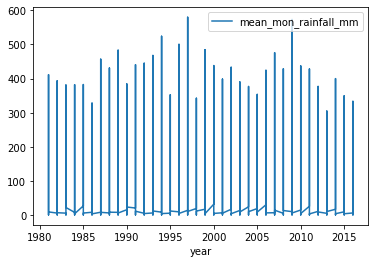

In [31]:
df.plot('year', 'mean_mon_rainfall_mm', kind='line')